In [1]:
from fredpy import series
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
%matplotlib inline

In [2]:
y1m= series('DTB4WK')
y3m= series('DTB3')
y6m= series('DTB6')
y1 = series('DGS1')
y5 = series('DGS5')
y10= series('DGS10')
y20= series('DGS20')
y30= series('DGS30')

# win = ['1977-02-15','2500-01-01']
win = ['1965-02-15','2500-01-01']
for y in [y1m,y3m,y6m,y1,y5,y10,y20,y30]:
    y.window(win)

y1m = pd.DataFrame(y1m.data,index = y1m.datenumbers,columns=['1 mo'])
y3m = pd.DataFrame(y3m.data,index = y3m.datenumbers,columns=['3 mo'])
y6m = pd.DataFrame(y6m.data,index = y6m.datenumbers,columns=['6 mo'])
y1 = pd.DataFrame(y1.data,index = y1.datenumbers,columns=['1 yr'])
y5 = pd.DataFrame(y5.data,index = y5.datenumbers,columns=['5 yr'])
y10 = pd.DataFrame(y10.data,index = y10.datenumbers,columns=['10 yr'])
y20 = pd.DataFrame(y20.data,index = y20.datenumbers,columns=['20 yr'])
y30 = pd.DataFrame(y30.data,index = y30.datenumbers,columns=['30 yr'])

yields = pd.concat([y1m,y3m,y6m,y1,y5,y10,y20,y30],axis=1)
yields = yields.dropna(thresh=1)
N = len(yields.index)

In [3]:
m = 0
n = -1
print('y1m',y1m.index[m],y1m.index[n])
print('y3m',y3m.index[m],y3m.index[n])
print('y6m',y6m.index[m],y6m.index[n])
print('y1',y1.index[m],y1.index[n])
print('y5',y5.index[m],y5.index[n])
print('y10',y10.index[m],y10.index[n])
print('y20',y20.index[m],y20.index[n])
print('y30',y30.index[m],y30.index[n])

y1m 2001-07-31 00:00:00 2016-02-11 00:00:00
y3m 1965-02-15 00:00:00 2016-02-11 00:00:00
y6m 1965-02-15 00:00:00 2016-02-11 00:00:00
y1 1965-02-15 00:00:00 2016-02-11 00:00:00
y5 1965-02-15 00:00:00 2016-02-11 00:00:00
y10 1965-02-15 00:00:00 2016-02-11 00:00:00
y20 1993-10-01 00:00:00 2016-02-11 00:00:00
y30 1977-02-15 00:00:00 2016-02-11 00:00:00


In [4]:
yields = yields[['3 mo','6 mo','1 yr','5 yr','10 yr']]

premiumDict = {}
for col in yields.columns:
    premiumDict[col] = yields.loc[:,col] - yields['3 mo']

premiums = pd.DataFrame(premiumDict)
averagePremiums = np.mean(premiums[['3 mo','6 mo','1 yr','5 yr','10 yr']])

dateBegin = str(yields.index[0])[0:10]
dateEnd = str(yields.index[-1])[0:10]
yields.to_csv('US_Treasury_Yields_'+dateBegin+'_'+dateEnd+'.csv')

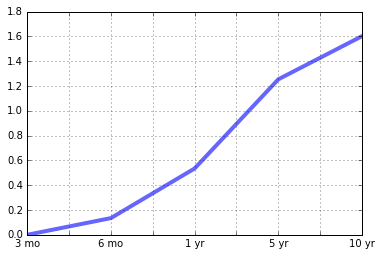

In [5]:
averagePremiums.plot(lw=4,alpha = 0.6,grid=True)

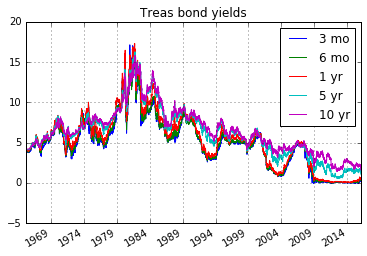

In [6]:
yields.plot(grid=True,title='Treas bond yields')